# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
astunparse                   1.6.3
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
contourpy                    1.0.7
cycler                       0.11.0
flatbuffers                  23.3.3
fonttools                    4.39.3
gast                         0.4.0
google-auth                  2.17.3
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.54.0
h5py                         3.8.0
idna                         3.4
importlib-metadata           6.6.0
importlib-resources          5.12.0
jax                          0.4.8
joblib                       1.2.0
keras                        2.12.0
kiwisolver                   1.4.4
libclang                     16.0.0
Markdown                     3.4.3
Mark

You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth, in case if we are using GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [6]:
#pip install opencv-python

In [7]:
#pip install --upgrade pip

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'data' 

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data', label_mode='categorical')

Found 616 files belonging to 6 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

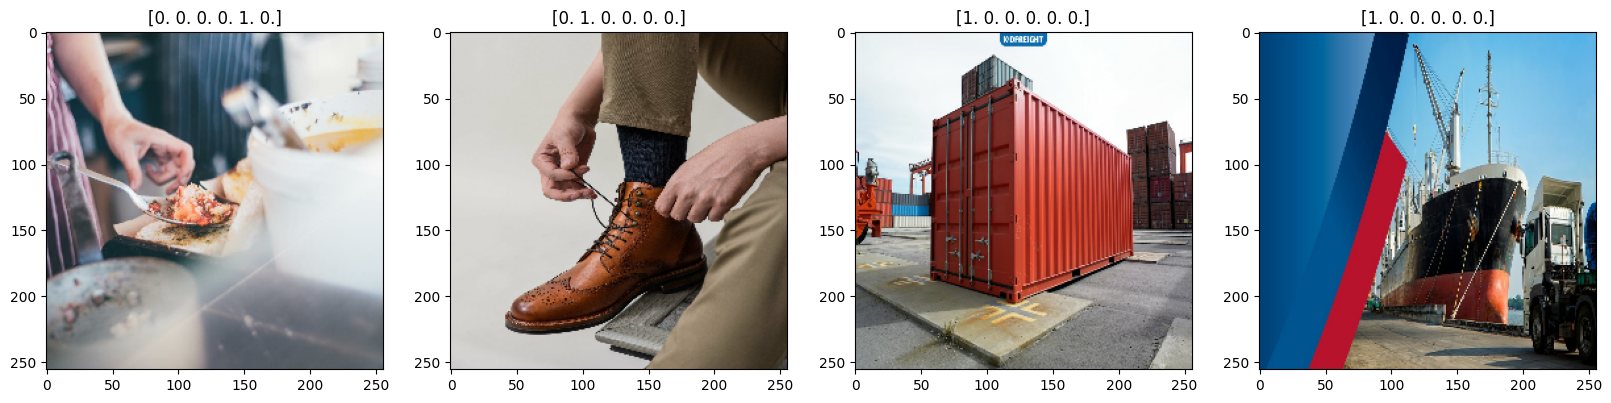

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.7764706 , 0.61960787, 0.48235294],
          [0.7764706 , 0.61960787, 0.48235294],
          [0.7764706 , 0.61960787, 0.48235294],
          ...,
          [0.81960785, 0.6666667 , 0.5372549 ],
          [0.8122549 , 0.67107844, 0.54558825],
          [0.81362545, 0.6606843 , 0.5312725 ]],
 
         [[0.7753753 , 0.6185126 , 0.48125765],
          [0.7775659 , 0.6207031 , 0.48344824],
          [0.7764706 , 0.61960787, 0.48235294],
          ...,
          [0.8134957 , 0.6605545 , 0.5311428 ],
          [0.812118  , 0.67094153, 0.54545134],
          [0.81087476, 0.6579336 , 0.52852184]],
 
         [[0.77161217, 0.61474943, 0.47749454],
          [0.77691436, 0.6200516 , 0.4827967 ],
          [0.77960324, 0.6227405 , 0.4854856 ],
          ...,
          [0.8203474 , 0.66740626, 0.5379945 ],
          [0.8117647 , 0.67058825, 0.54509807],
          [0.81573987, 0.6627987 , 0.53338695]],
 
         ...,
 
         [[0.39614546, 0.29173368, 0.21011604],
          [0.35891

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
len(data)

20

In [ ]:
train_size

14

In [ ]:
val_size

4

In [ ]:
test_size

2

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
#model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 26s 2s/step - loss: 2.2314 - accuracy: 0.1585 - val_loss: 1.7350 - val_accuracy: 0.2578
Epoch 2/20
14/14 [==============================] - 23s 1s/step - loss: 1.6805 - accuracy: 0.2679 - val_loss: 1.4693 - val_accuracy: 0.4062
Epoch 3/20
14/14 [==============================] - 22s 1s/step - loss: 1.4947 - accuracy: 0.3862 - val_loss: 1.2506 - val_accuracy: 0.5234
Epoch 4/20
14/14 [==============================] - 21s 1s/step - loss: 1.2614 - accuracy: 0.5290 - val_loss: 1.0359 - val_accuracy: 0.6328
Epoch 5/20
14/14 [==============================] - 28s 2s/step - loss: 1.0979 - accuracy: 0.6138 - val_loss: 0.8973 - val_accuracy: 0.6875
Epoch 6/20
14/14 [==============================] - 32s 2s/step - loss: 0.8725 - accuracy: 0.7009 - val_loss: 0.8711 - val_accuracy: 0.6719
Epoch 7/20
14/14 [==============================] - 22s 1s/step - loss: 0.6697 - accuracy: 0.7902 - val_loss: 0.5432 - val_accuracy: 0.8281
Epoch 8/20
14/14 [==

# 8. Plot Performance

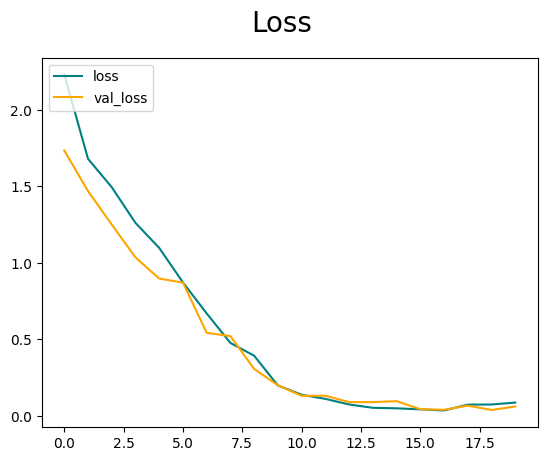

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

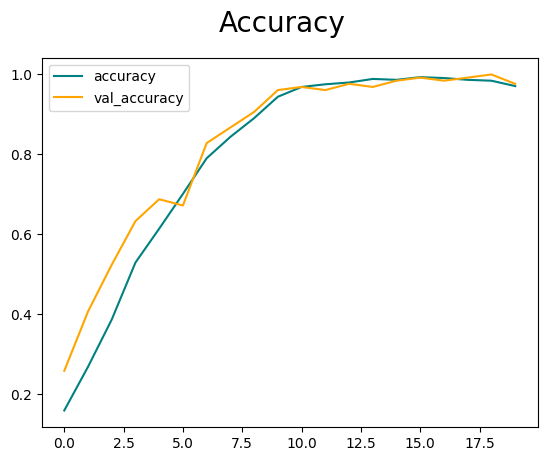

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, F1Score, Accuracy, AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, CategoricalCrossentropy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
f1 = F1Score(6, average='macro')
auc = AUC() 
tp = TruePositives()
tn = TrueNegatives()
fp = FalsePositives()
fn = FalseNegatives()
cce = CategoricalCrossentropy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    f1.update_state(y, yhat)
    auc.update_state(y, yhat)
    tp.update_state(y, yhat)
    tn.update_state(y, yhat)
    fp.update_state(y, yhat)
    fn.update_state(y, yhat)
    cce.update_state(y, yhat)
    

1/1 [==============================] - 0s 61ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.975, shape=(), dtype=float32) tf.Tensor(0.975, shape=(), dtype=float32) tf.Tensor(0.975, shape=(), dtype=float32)


In [ ]:
print(f1.result(), auc.result())

In [ ]:
print(tp.result(), tn.result(), fp.result(), fn.result())


In [ ]:
print(cce.result())

# 10. Test

In [ ]:
import cv2

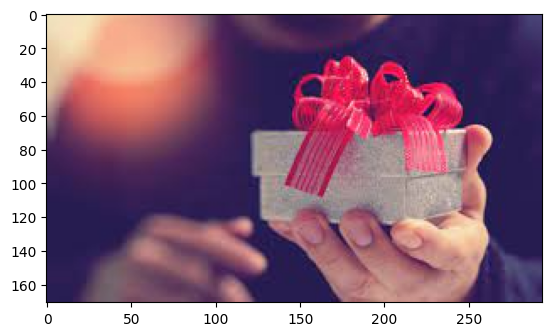

In [ ]:
img = cv2.imread('gift.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

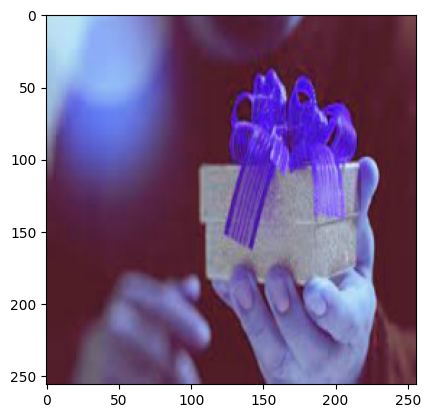

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [ ]:
yhat

array([[6.3826907e-03, 1.5042507e-03, 1.6744176e-05, 1.7246598e-02,
        1.6307633e-04, 9.7468662e-01]], dtype=float32)

In [ ]:
print(yhat[0][0])

0.0063826907


In [ ]:
if yhat[0][0] > 0.5: 
    print(f'Predicted class is cargo/freigh')
elif yhat[0][1] > 0.5:
    print(f'Predicted class is clothing/shoes')
elif yhat[0][2] > 0.5:
    print(f'Predicted class is documents')
elif yhat[0][3] > 0.5:
    print(f'Predicted class is equipment/tools')
elif yhat[0][4] > 0.5:
    print(f'Predicted class is food/drinks')
elif yhat[0][5] > 0.5:
    print(f'Predicted class is gift')

Predicted class is gift


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('models//imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


array([[6.3826907e-03, 1.5042507e-03, 1.6744176e-05, 1.7246598e-02,
        1.6307633e-04, 9.7468662e-01]], dtype=float32)